# <font color = blue > MNIST Handrwitten Number Prediction Using CNN and Dropout Layer<font color>

***

Predict the handwritten number in a greyscale image using a Convolutional Neural Network.
MNIST contains 60,000 labelled images of handwritten digists from 0 - 9 and 10,000 test images also from 0-9.


In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import livelossplot
import keras
from keras import Sequential
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
#import the numbers dataset from Keras.  Contains handwritten digits from 0-9
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [4]:
#shape the data into arrays with the image sizes
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [5]:
#pick an number to display one of the images
image=1000

In [6]:
#use matplotlib to plot an image
picture = x_train[image]
picture = picture.reshape(28,28) 


digit =  0


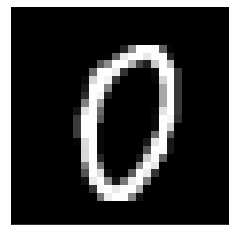

In [7]:
# Display the labelled digit for the picture
lbl = y_train[image]
print("\ndigit = ", lbl)

# Print a 'picture' of the number
plt.imshow(picture, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show() 

In [130]:
#Display the values of each of the nodes in the MINST image representing the handwritten number
for rows in range(0,28):
    for columns in range(0,28):
      print("%02X " % picture[rows][columns], end="")
    print("")

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 24 92 FE FF FB 5F 06 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 61 EA FE FE E8 FE FE 23 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 59 8C FE FE AE 43 21 C8 FE BE 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 6C FD FE EB 33 01 00 00 0C FE FD 38 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0C D8 FE F4 37 00 00 00 00 06 D5 FE 39 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 19 FE FE 84 00 00 00 00 00 00 A8 FE 39 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 2D FE F3 22 00 00 00 00 00 00 A8 FE 39

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
# Add layersfrom keras.models import Sequential
model = Sequential()

from keras.layers import Conv2D
model.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#max ppoling layer
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#add flattening layer
from keras.layers import Flatten
model.add(Flatten())

In [13]:
#add a dense layer
from keras.layers import Dense
model.add(Dense(units=128, activation='relu'))

In [14]:
#add a dense layer
model.add(Dense(units=64, activation='relu'))

In [15]:
#add softmax activation on dense layer for output
model.add(Dense(units=10, activation='softmax'))

In [17]:
#compile the model.  
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#use line below if not using livelossplot
#model.fit(x_train, y_train, epochs=10)

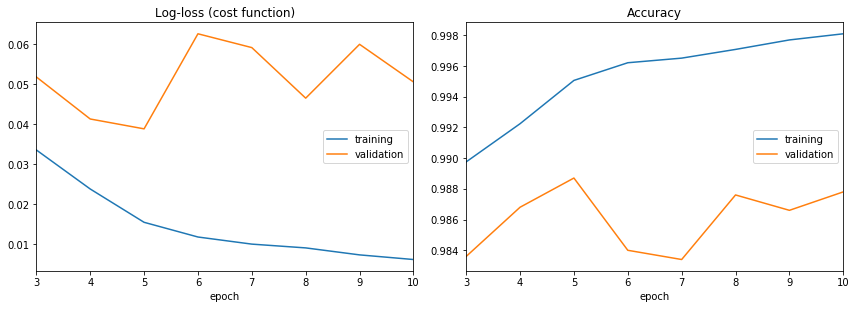

Log-loss (cost function):
training   (min:    0.006, max:    0.167, cur:    0.006)
validation (min:    0.039, max:    0.073, cur:    0.051)

Accuracy:
training   (min:    0.948, max:    0.998, cur:    0.998)
validation (min:    0.977, max:    0.989, cur:    0.988)


In [18]:
#use livelossplot to show the curve
from livelossplot import PlotLossesKeras

model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [19]:
#pull the loss and accuracy from the model
loss, accuracy = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 274us/step


In [20]:
loss

0.05052659668960805

In [21]:
accuracy

0.9878

## With minimal optimization, this simple CNN model run through KERAS can predict the handwritten number in an image with an accuracy of 98.8%

Adding a dropout and optimizing the parameters could likely increase the predictive capability of the model upwards of 99+%.








In [99]:
# Add layers from keras.models import Sequential
model2=''
model2 = Sequential()

from keras.layers import Conv2D
model2.add(Conv2D(28, (3, 3), input_shape=(28, 28, 1), activation='relu'))

In [100]:
#add a max pooling layer
from keras.layers import MaxPooling2D
model2.add(MaxPooling2D(pool_size=(4, 4)))

In [101]:
#add a dense layer
from keras.layers import Dense
model2.add(Dense(units=100, activation='relu'))

In [102]:
#add flattening layer
from keras.layers import Flatten
model2.add(Flatten())

In [103]:
from keras.layers import Dropout, Dense 
model2.add(Dropout(rate=0.5))

In [104]:
#add a dense layer
model2.add(Dense(units=60, activation='relu'))

In [105]:
#add softmax activation on dense layer for output
model2.add(Dense(units=10, activation='softmax'))

In [106]:
#compile the model. 
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#use line below if not using livelossplot
#model.fit(x_train, y_train, epochs=10)

In [107]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 28)          0         
_________________________________________________________________
dense_25 (Dense)             (None, 6, 6, 100)         2900      
_________________________________________________________________
flatten_9 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 3600)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 60)                216060    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                610       
Total para

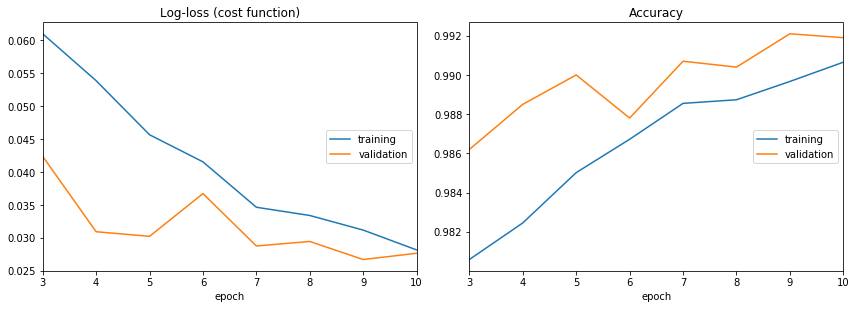

Log-loss (cost function):
training   (min:    0.028, max:    0.212, cur:    0.028)
validation (min:    0.027, max:    0.066, cur:    0.028)

Accuracy:
training   (min:    0.935, max:    0.991, cur:    0.991)
validation (min:    0.979, max:    0.992, cur:    0.992)


In [108]:
#use livelossplot to show the curve
from livelossplot import PlotLossesKeras

model2.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=0)

In [109]:
loss, accuracy = model2.evaluate(x_test,y_test)
print(accuracy)

10000/10000 [==============================] - 2s 185us/step
0.9919


## Some modifications of the hyperparameters and the addition of a dropout layer to avoid overfitting improved the accuracy of the CNN prediction to 99.2%.
